In [2]:
%pylab inline
import matplotlib.pyplot  as plt
import numpy 
from scipy import interpolate
import mdtraj as md
import sys,os
import seaborn as sbn
sbn.set_style("whitegrid")

import mdtraj as md

Populating the interactive namespace from numpy and matplotlib


In [3]:
#The first time I will execute the code  I will load all the trajectories,
#then I will save all the dihedrals information on dat or csv file, whicvh will be open next
#in this way the next time I am going to use the script/if someone else wants to use the script, he has only to open the
#dat/csv files without wasting time with the traj
#Skip b since it's benzene-benzene
#a
traj_aeq_cyc = md.load("../a_eq/cyc/run001/discharge/output/lambda-0.000/traj000000001.dcd",top="../a_eq/cyc/input/SYSTEM.prmtop")
traj_aeq_wat = md.load("../a_eq/free/run001/discharge/output/lambda-0.000/traj000000001.dcd",top="../a_eq/free/input/SYSTEM.prmtop")
#a axial

traj_aax_cyc = md.load("../a_axial/cyc/run001/discharge/output/lambda-0.000/traj000000001.dcd",top="../a_axial/cyc/input/SYSTEM.prmtop")
traj_aax_wat = md.load("../a_axial/free/run001/discharge/output/lambda-0.000/traj000000001.dcd",top="../a_axial/free/input/SYSTEM.prmtop")
#c
traj_c_cyc = md.load("../c/cyc/run001/discharge/output/lambda-0.000/traj000000001.dcd",top="../c/cyc/input/SYSTEM.prmtop")
traj_c_wat = md.load("../c/free/run001/discharge/output/lambda-0.000/traj000000001.dcd",top="../c/free/input/SYSTEM.prmtop")
#d
traj_d_cyc = md.load("../d/cyc/run001/discharge/output/lambda-0.000/traj000000001.dcd",top="../d/cyc/input/SYSTEM.prmtop")
traj_d_wat = md.load("../d/free/run001/discharge/output/lambda-0.000/traj000000001.dcd",top="../d/free/input/SYSTEM.prmtop")
#e
traj_e_cyc = md.load("../e/cyc/run001/discharge/output/lambda-0.000/traj000000001.dcd",top="../e/cyc/input/SYSTEM.prmtop")
traj_e_wat = md.load("../e/free/run001/discharge/output/lambda-0.000/traj000000001.dcd",top="../e/free/input/SYSTEM.prmtop")

In [5]:
#now for each trajectory we are going to measure the dihedrals to se eif th emolecule is in a chair conformation
# mdtraj.compute_dihedrals(traj, indices, periodic=True, opt=True)

#compute  a in cyclohexane dihedral for C6-C2-C1-C5   values are in rad
a_eqcyc = md.compute_dihedrals(traj_aeq_cyc,[[5,1,0,4],[5,2,3,4]],periodic=True,opt=True)
a_eqwat = md.compute_dihedrals(traj_aeq_wat,[[5,1,0,4],[5,2,3,4]],periodic=True,opt=True)


#compute  a axial in cyclohexane dihedral for C6-C2-C1-C5   values are in rad
a_axcyc = md.compute_dihedrals(traj_aax_cyc,[[4,0,1,5],[4,3,2,5]],periodic=True,opt=True)
a_axwat = md.compute_dihedrals(traj_aax_wat,[[4,0,1,5],[4,3,2,5]],periodic=True,opt=True)

#compute c  C6-C2-C1-C5  and C6-C3-C4-C5
c_cyc = md.compute_dihedrals(traj_c_cyc,[[5,1,0,4],[5,2,3,4]],periodic=True,opt=True)
c_wat = md.compute_dihedrals(traj_c_wat,[[5,1,0,4],[5,2,3,4]],periodic=True,opt=True)

#compute d  C5-C4-C3-C2 and C5-C6-C1-C2
d_cyc = md.compute_dihedrals(traj_d_cyc,[[4,5,0,1],[4,3,2,1]],periodic=True,opt=True)
d_wat = md.compute_dihedrals(traj_d_wat,[[4,5,0,1],[4,3,2,1]],periodic=True,opt=True)

#compute e C5-C6-C1-C2  and C5-C4-C3-C2
e_cyc = md.compute_dihedrals(traj_e_cyc,[[5,2,3,4],[5,1,0,4]],periodic=True,opt=True)
e_wat = md.compute_dihedrals(traj_e_wat,[[5,2,3,4],[5,1,0,4]],periodic=True,opt=True)


In [6]:
#now convert each dihedral in deg and save to a file in a specific folder
if not os.path.exists("dihedral_files"):
    os.makedirs("dihedral_files")
#####################################################################
aeq_cyc_dih = open("dihedral_files/aeq_cyc.csv","w")
aeq_wat_dih = open("dihedral_files/aeq_wat.csv","w")

for dih in a_eqcyc:
    #the order is  1st  2nd  dihedrals
    aeq_cyc_dih.write("%.4f,%.4f\n" % (dih[0]*57.29,dih[1]*57.29))

aeq_cyc_dih.close()  

for dih in a_eqwat:
    #the order is  1st  2nd  dihedrals
    aeq_wat_dih.write("%.4f,%.4f\n" % (dih[0]*57.29,dih[1]*57.29))

aeq_wat_dih.close()  
#####################################################################
#####################################################################
aax_cyc_dih = open("dihedral_files/aax_cyc.csv","w")
aax_wat_dih = open("dihedral_files/aax_wat.csv","w")

for dih in a_axcyc:
    #the order is  1st  2nd  dihedrals
    aax_cyc_dih.write("%.4f,%.4f\n" % (dih[0]*57.29,dih[1]*57.29))

aax_cyc_dih.close()  

for dih in a_axwat:
    #the order is  1st  2nd  dihedrals
    aax_wat_dih.write("%.4f,%.4f\n" % (dih[0]*57.29,dih[1]*57.29))

aax_wat_dih.close()  
#####################################################################
c_cyc_dih = open("dihedral_files/c_cyc.csv","w")
c_wat_dih = open("dihedral_files/c_wat.csv","w")

for dih in c_cyc:
    #the order is  1st  2nd  dihedrals
    c_cyc_dih.write("%.4f,%.4f\n" % (dih[0]*57.29,dih[1]*57.29))

c_cyc_dih.close()  
    
for dih in c_wat:
    #the order is  1st  2nd  dihedrals
    c_wat_dih.write("%.4f,%.4f\n" % (dih[0]*57.29,dih[1]*57.29))

c_wat_dih.close()  
#####################################################################

d_cyc_dih = open("dihedral_files/d_cyc.csv","w")
d_wat_dih = open("dihedral_files/d_wat.csv","w")

for dih in d_cyc:
    #the order is  1st  2nd  dihedrals
    d_cyc_dih.write("%.4f,%.4f\n" % (dih[0]*57.29,dih[1]*57.29))

d_cyc_dih.close()  
    
for dih in d_wat:
    #the order is  1st  2nd  dihedrals
    d_wat_dih.write("%.4f,%.4f\n" % (dih[0]*57.29,dih[1]*57.29))

d_wat_dih.close()  

e_cyc_dih = open("dihedral_files/e_cyc.csv","w")
e_wat_dih = open("dihedral_files/e_wat.csv","w")
#####################################################################

for dih in e_cyc:
    #the order is  1st  2nd  dihedrals
    e_cyc_dih.write("%.4f,%.4f\n" % (dih[0]*57.29,dih[1]*57.29))

e_cyc_dih.close()  
    
for dih in e_wat:
    #the order is  1st  2nd  dihedrals
    e_wat_dih.write("%.4f,%.4f\n" % (dih[0]*57.29,dih[1]*57.29))

e_wat_dih.close()  
#I am closing all the files since these first 3 cells of code should not be done again

In [7]:
#This is the real start of the code now
#We have all the files and we are going to open them
#Usually a chair conformations has  60/-60 deg in the chosen dihedrals
#Plot vs time (ns) 2ns max time

#Now here create a 2D list for cyclohexane and water phase and fill it with the degrees
#a_cyc
#####################################################################
aeq_cyc= [ [], [] ]
with open("dihedral_files/aeq_cyc.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        aeq_cyc[0].append(dih0)
        aeq_cyc[1].append(dih1)
        
#a_wat
aeq_wat= [ [], [] ]
with open("dihedral_files/aeq_wat.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        aeq_wat[0].append(dih0)
        aeq_wat[1].append(dih1)
#####################################################################
#####################################################################
aax_cyc= [ [], [] ]
with open("dihedral_files/aax_cyc.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        aax_cyc[0].append(dih0)
        aax_cyc[1].append(dih1)
        
#a_wat
aax_wat= [ [], [] ]
with open("dihedral_files/aax_wat.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        aax_wat[0].append(dih0)
        aax_wat[1].append(dih1)
#####################################################################
#c_cyc
c_cyc= [ [], [] ]
with open("dihedral_files/c_cyc.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        c_cyc[0].append(dih0)
        c_cyc[1].append(dih1)
        
#c_wat
c_wat= [ [], [] ]
with open("dihedral_files/c_wat.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        c_wat[0].append(dih0)
        c_wat[1].append(dih1)        
#####################################################################

#d_cyc
d_cyc= [ [], [] ]
with open("dihedral_files/d_cyc.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        d_cyc[0].append(dih0)
        d_cyc[1].append(dih1)
        
#d_wat
d_wat= [ [], [] ]
with open("dihedral_files/d_wat.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        d_wat[0].append(dih0)
        d_wat[1].append(dih1)       
#####################################################################
        
#e_cyc
e_cyc= [ [], [] ]
with open("dihedral_files/e_cyc.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        e_cyc[0].append(dih0)
        e_cyc[1].append(dih1)
        
#e_wat
e_wat= [ [], [] ]
with open("dihedral_files/e_wat.csv") as f:
    for line in f:
        dih0 = float(line.split(",")[0])
        dih1 = float(line.split(",")[1])
        e_wat[0].append(dih0)
        e_wat[1].append(dih1) 
        


In [8]:
#now gather all the values together and make a histogram to show the correct distribution of dihedrals
#http://stackoverflow.com/questions/5328556/histogram-matplotlib
#####################################################################
aeq_cyc_hist,bins= numpy.histogram(aeq_cyc,bins=50)
width_aeq_cyc = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_aeq_cyc = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram

#a in water
aeq_wat_hist,bins= numpy.histogram(aeq_wat,bins=50)
width_aeq_wat = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_aeq_wat = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram
#####################################################################
aax_cyc_hist,bins= numpy.histogram(aax_cyc,bins=50)
width_aax_cyc = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_aax_cyc = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram

#a in water
aax_wat_hist,bins= numpy.histogram(aax_wat,bins=50)
width_aax_wat = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_aax_wat = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram
#####################################################################
#c in cyc
c_cyc_hist,bins= numpy.histogram(c_cyc,bins=50)
width_c_cyc = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_c_cyc = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram

#c in water
c_wat_hist,bins= numpy.histogram(c_wat,bins=50)
width_c_wat = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_c_wat = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram
#####################################################################
#d in cyc
d_cyc_hist,bins= numpy.histogram(d_cyc,bins=50)
width_d_cyc = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_d_cyc = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram

#d in water
d_wat_hist,bins= numpy.histogram(d_wat,bins=50)
width_d_wat = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_d_wat = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram
#####################################################################
#e in cyc
e_cyc_hist,bins= numpy.histogram(e_cyc,bins=50)
width_e_cyc = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_e_cyc = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram

#e in water
e_wat_hist,bins= numpy.histogram(e_wat,bins=50)
width_e_wat = 0.7 * (bins[1] - bins[0])  #decide the width of each bin  (stackoverflow teaches )
center_e_wat = (bins[:-1] + bins[1:])/2  #take the average between first and last bin as the center of the histogram

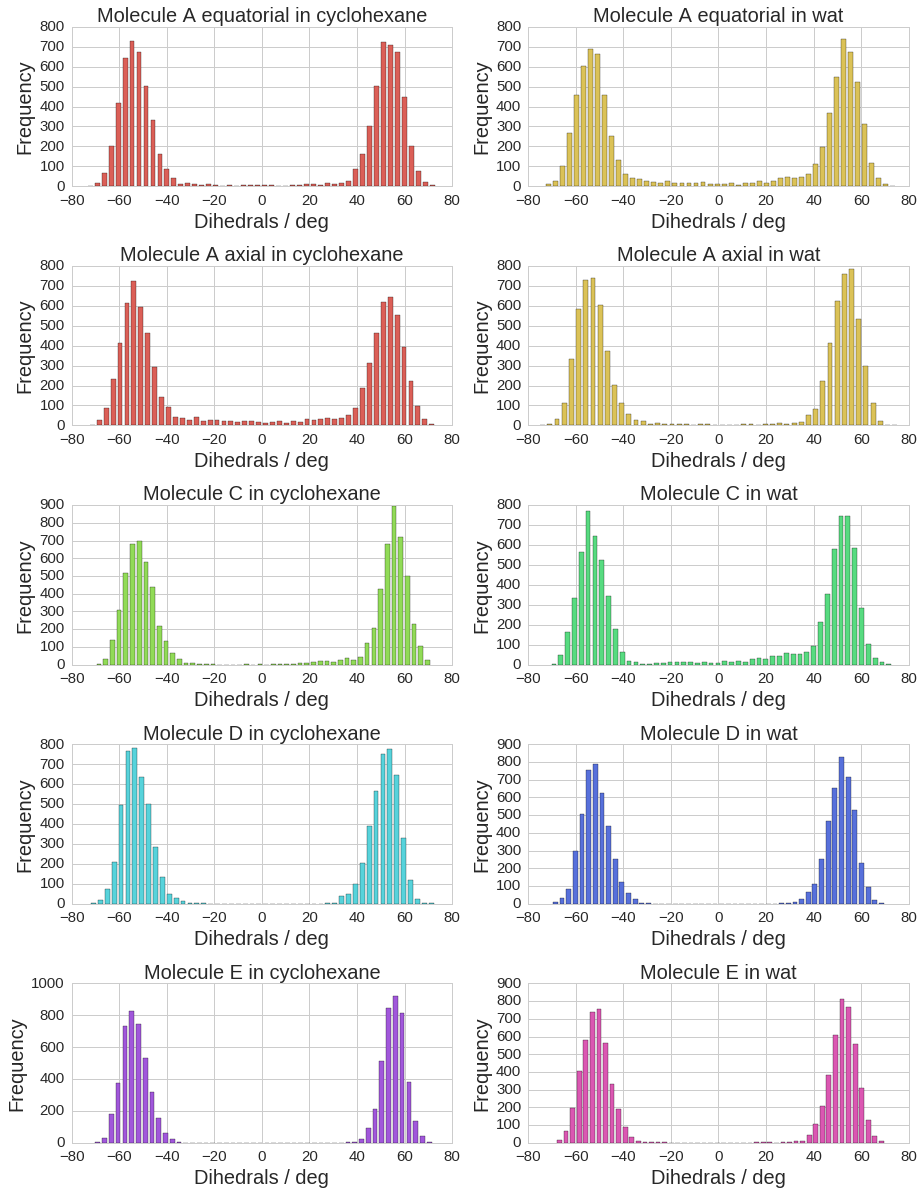

In [9]:
#http://stackoverflow.com/questions/5328556/histogram-matplotlib
colors =(sbn.color_palette("hls", 8))

#fix the xticks and yticks for all the plots to 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
#create a 4x2  subplot of 15"x20" dimension
fig,axarr = plt.subplots(5,2,figsize=(15,20))
#fix the space between subplots to .3"
fig.subplots_adjust(hspace=.5)

#a equatorial in cyc and water
axarr[0,0].bar(center_aeq_cyc,aeq_cyc_hist,align="center",width=width_aeq_cyc,color=colors[0])
axarr[0,0].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[0,0].set_ylabel("Frequency",fontsize=20)
axarr[0,0].set_title("Molecule A equatorial in cyclohexane",fontsize=20)
axarr[0,1].bar(center_aeq_wat,aeq_wat_hist,align="center",width=width_aeq_cyc,color=colors[1])
axarr[0,1].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[0,1].set_ylabel("Frequency",fontsize=20)
axarr[0,1].set_title("Molecule A equatorial in wat",fontsize=20)
#a axial in cyc and water
axarr[1,0].bar(center_aax_cyc,aax_cyc_hist,align="center",width=width_aax_cyc,color=colors[0])
axarr[1,0].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[1,0].set_ylabel("Frequency",fontsize=20)
axarr[1,0].set_title("Molecule A axial in cyclohexane",fontsize=20)
axarr[1,1].bar(center_aax_wat,aax_wat_hist,align="center",width=width_aax_cyc,color=colors[1])
axarr[1,1].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[1,1].set_ylabel("Frequency",fontsize=20)
axarr[1,1].set_title("Molecule A axial in wat",fontsize=20)
#c in cyc and water
axarr[2,0].bar(center_c_cyc,c_cyc_hist,align="center",width=width_c_cyc,color=colors[2])
axarr[2,0].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[2,0].set_ylabel("Frequency",fontsize=20)
axarr[2,0].set_title("Molecule C in cyclohexane",fontsize=20)
axarr[2,1].bar(center_c_wat,c_wat_hist,align="center",width=width_c_cyc,color=colors[3])
axarr[2,1].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[2,1].set_ylabel("Frequency",fontsize=20)
axarr[2,1].set_title("Molecule C in wat",fontsize=20)
#d in cyc and water
axarr[3,0].bar(center_d_cyc,d_cyc_hist,align="center",width=width_d_cyc,color=colors[4])
axarr[3,0].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[3,0].set_ylabel("Frequency",fontsize=20)
axarr[3,0].set_title("Molecule D in cyclohexane",fontsize=20)
axarr[3,1].bar(center_d_wat,d_wat_hist,align="center",width=width_d_cyc,color=colors[5])
axarr[3,1].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[3,1].set_ylabel("Frequency",fontsize=20)
axarr[3,1].set_title("Molecule D in wat",fontsize=20)
#e in cyc and water
axarr[4,0].bar(center_e_cyc,e_cyc_hist,align="center",width=width_e_cyc,color=colors[6])
axarr[4,0].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[4,0].set_ylabel("Frequency",fontsize=20)
axarr[4,0].set_title("Molecule E in cyclohexane",fontsize=20)
axarr[4,1].bar(center_e_wat,e_wat_hist,align="center",width=width_e_cyc,color=colors[7])
axarr[4,1].set_xlabel("Dihedrals / deg",fontsize=20)
axarr[4,1].set_ylabel("Frequency",fontsize=20)
axarr[4,1].set_title("Molecule E in wat",fontsize=20)
plt.show()
fig.tight_layout()
